In [62]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from new_helpers import *
from original_helpers import *
from features import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Building the model data

In [204]:
X, Y = build_model_data(extract_features_edge)
poly = PolynomialFeatures(6)
X = poly.fit_transform(X)
print(X.shape)

X [(6250, 7)] and Y [(6250,)]
(6250, 1716)


# LogisticRegression

In [151]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(C=1e5, class_weight="balanced")
logreg.fit(X, Y)

LogisticRegression(C=100000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [152]:
# Predict on the training set
Z = logreg.predict(X)

# Get non-zeros in prediction and grountruth arrays
Zn = np.nonzero(Z)[0]
Yn = np.nonzero(Y)[0]

TPR = len(list(set(Yn) & set(Zn))) / float(len(Z))
print('True positive rate = ' + str(TPR))
print('F1-score:', f1_score(Y,Z))
print('Confusion matrix:', pretty_confusion(["road", "bg"], Y, Z))

True positive rate = 0.20304
F1-score: 0.566012488849
            t/p           road             bg
           road           3035           1387
             bg            559           1269
Confusion matrix: None


# KNeighborsClassifier

In [205]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X, Y) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [183]:
# Predict on the training set
Z = neigh.predict(X)

# Get non-zeros in prediction and grountruth arrays
Zn = np.nonzero(Z)[0]
Yn = np.nonzero(Y)[0]

TPR = len(list(set(Yn) & set(Zn))) / float(len(Z))
print('True positive rate = ' + str(TPR))
print('F1-score:', f1_score(Y,Z))
print('Confusion matrix:', pretty_confusion(["road", "bg"], Y, Z))

True positive rate = 0.17376
F1-score: 0.745367192862
            t/p           road             bg
           road           4422              0
             bg            742           1086
Confusion matrix: None


# Cross-validation

In [206]:
from sklearn.cross_validation import cross_val_score
cr_val = cross_val_score(neigh, X, Y, cv=10, scoring='f1')
print(cr_val)
print(cr_val.mean())

[ 0.51369863  0.5775076   0.66666667  0.50980392  0.4029304   0.46666667
  0.50526316  0.54035088  0.45614035  0.51590106]
0.515492933279


# Display prediction

F1-score: 0.504983388704
            t/p             bg           road
             bg            400             36
           road            113             76
Confusion matrix: None


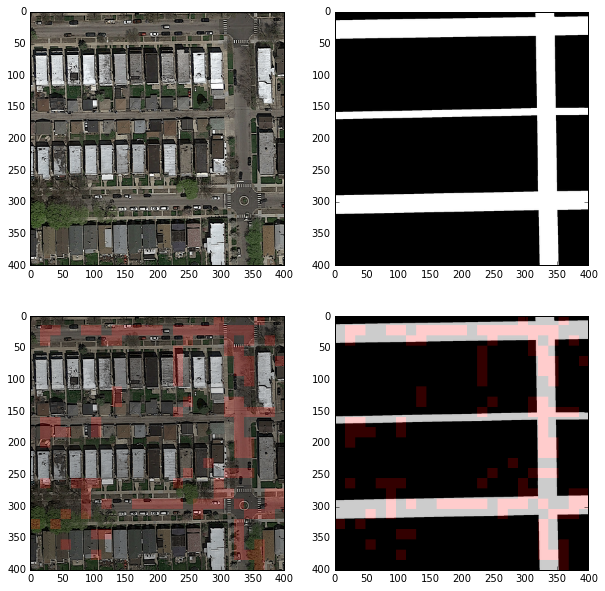

In [207]:
img_idx = 62
img, gt, Yi, Xi = extract_img_features_new(img_idx, extract_features_edge)
poly = PolynomialFeatures(6)
Xi = poly.fit_transform(Xi)
Zi = neigh.predict(Xi)

display_prediction_alt(img, gt, 16, Zi)
print('F1-score:', f1_score(Yi,Zi))
print('Confusion matrix:', pretty_confusion(["bg", "road"], Yi, Zi))